In [1]:
from cmdstanpy import CmdStanModel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generating data {x, t}

In [7]:
N = 100
x_list = []
t_list = []

# t = y(x, w) + noise

$p(t_n|\mathbf{x}) = \mathcal{N}(t_n|y(\mathbf{x}_n), \sigma^2)$


In [8]:
# y(x) = ax + b
a = 5
b = 4
sigma = 8 # for noise

for i in range(N):
    x = random.uniform(0, 10)
    noise = random.gauss(0, sigma)

    t = (a*x + b) + noise

    x_list.append(x)
    t_list.append(t)

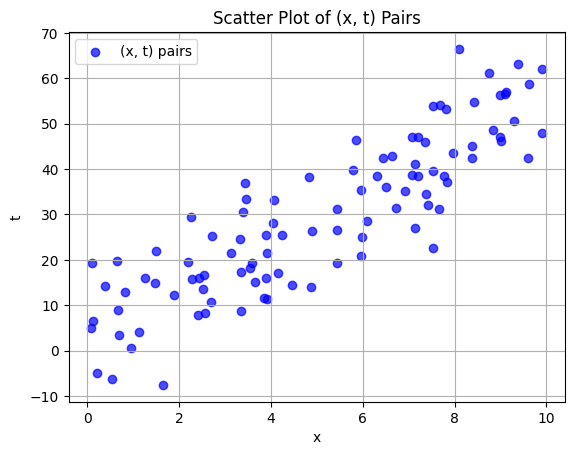

In [9]:
# Plotting the data
plt.scatter(x_list, t_list, alpha=0.7, label="(x, t) pairs", color="blue")
plt.title("Scatter Plot of (x, t) Pairs")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.grid(True)
plt.show()

This is what the generated data looks like. Now using this we will try to model and get the distribution of parameters.

## Kernel Matrix

We use the RBF kernel with gamma=1 to get a NxN matrix K

In [10]:
# x_list is a length N list of data points.
x_array = np.array(x_list).reshape(-1, 1)  # Reshape to 2D array for pairwise operations

# Parameters
gamma = 1.0

# Compute the RBF kernel matrix
def rbf_kernel_matrix(x_array, gamma):
    # Compute pairwise squared Euclidean distances
    sq_dists = np.sum(x_array**2, axis=1).reshape(-1, 1) + np.sum(x_array**2, axis=1) - 2 * np.dot(x_array, x_array.T)
    # Compute the RBF kernel
    kernel_matrix = np.exp(-gamma * sq_dists)
    return kernel_matrix

K = rbf_kernel_matrix(x_array, gamma)

print(K)


[[1.00000000e+00 2.07824486e-06 6.08962843e-05 ... 4.54805756e-03
  8.32487484e-01 2.22775530e-03]
 [2.07824486e-06 1.00000000e+00 7.77491535e-01 ... 1.86985338e-01
  3.83128658e-05 2.68930949e-01]
 [6.08962843e-05 7.77491535e-01 1.00000000e+00 ... 5.33032242e-01
  7.30564095e-04 6.60247836e-01]
 ...
 [4.54805756e-03 1.86985338e-01 5.33032242e-01 ... 1.00000000e+00
  2.76625174e-02 9.78075415e-01]
 [8.32487484e-01 3.83128658e-05 7.30564095e-04 ... 2.76625174e-02
  1.00000000e+00 1.53924394e-02]
 [2.22775530e-03 2.68930949e-01 6.60247836e-01 ... 9.78075415e-01
  1.53924394e-02 1.00000000e+00]]


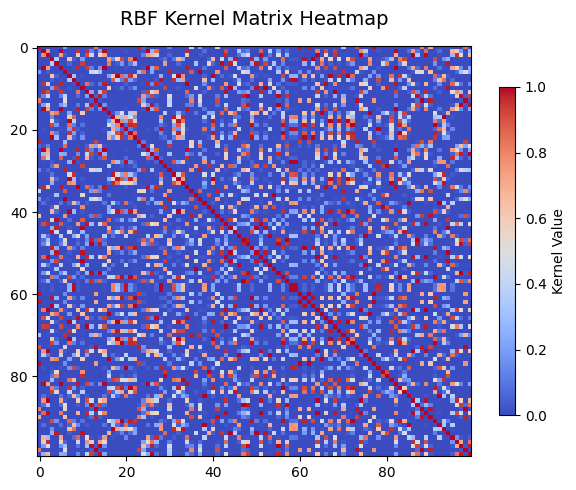

In [16]:
plt.figure(figsize=(6, 5))
plt.imshow(K, interpolation='nearest', cmap='coolwarm', aspect='auto')
plt.colorbar(label="Kernel Value", shrink=0.8)
plt.title("RBF Kernel Matrix Heatmap", fontsize=14, pad=15)
plt.grid(False)  # No grid for a cleaner look
plt.tight_layout()
plt.show()

## Probabilistic model

In [20]:
model = CmdStanModel(stan_file="/Users/namangupta/Desktop/itsstan/bayes_linreg/bayes_linreg_model.stan")

18:25:44 - cmdstanpy - INFO - compiling stan file /Users/namangupta/Desktop/itsstan/bayes_linreg/bayes_linreg_model.stan to exe file /Users/namangupta/Desktop/itsstan/bayes_linreg/bayes_linreg_model
18:25:50 - cmdstanpy - INFO - compiled model executable: /Users/namangupta/Desktop/itsstan/bayes_linreg/bayes_linreg_model
